In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [9]:
datos=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [4]:
from sklearn.decomposition import PCA

In [5]:
PCA?

In [7]:
componentes=PCA(n_components =3)

In [8]:
componentes

PCA(n_components=3)

In [11]:
componentes.fit(datos)

PCA(n_components=3)

In [13]:
df=componentes.transform(datos)

In [ ]:
## componentes.fit_transform(datos)

In [15]:
df[:10]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272]])

In [16]:
len(df)

150

In [17]:
componentes.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [18]:
componentes.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

In [51]:
componentes.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782])

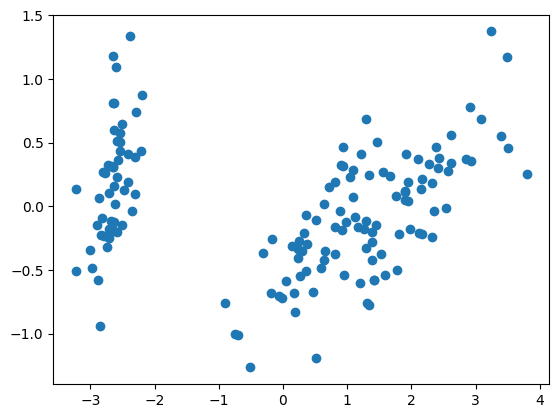

In [21]:
plt.scatter(df[:,0],df[:,1])

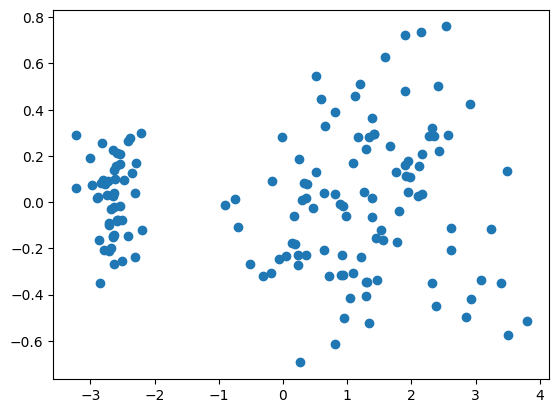

In [22]:
plt.scatter(df[:,0],df[:,2])

In [23]:
df=df[:,:2]

In [25]:
df=pd.DataFrame(df,columns=["PC1","PC2"])

In [27]:
df["Target"]=iris.target

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, f1_score

In [29]:
X_train, X_test, y_train,y_test = train_test_split(df[["PC1","PC2"]],df["Target"],
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   random_state=1234)

In [30]:
Modelo=KNeighborsClassifier()

In [31]:
Modelo.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred=Modelo.predict(X_test)

In [33]:
y_pred

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

In [34]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2
Target,,,
0,9,0,0
1,0,13,0
2,0,0,8


In [35]:
mean_absolute_percentage_error(y_test,y_pred)

0.0

In [37]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Sin utilizar PCA

In [40]:
Modelo2=KNeighborsClassifier()

In [41]:
X_train, X_test, y_train,y_test = train_test_split(datos,iris.target,
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   random_state=1234)

In [42]:
Modelo2.fit(X_train,y_train)


KNeighborsClassifier()

In [43]:
y_pred=Modelo2.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [45]:
datos.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


##  Ejercicio Cancer

In [47]:
from sklearn.datasets import load_breast_cancer

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
from sklearn.preprocessing import power_transform

In [50]:
power_transform?